In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales/Walmart_sales.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Add ML libraries (e.g., Scikit-learn, XGBoost, etc.)

In [3]:
data = pd.read_csv('/kaggle/input/walmart-sales/Walmart_sales.csv') 

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.describe() 

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
# Importing the necessary library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Let's define our target variable (y)
y = data['Weekly_Sales']

# and our independent variables (X)
X = data.drop(['Weekly_Sales', 'Date'], axis=1)  # We drop 'Date' as it's not a numerical value and is not directly correlated with revenue, and 'Weekly_Sales' is our target variable

# Let's also scale our data, as they have different units
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Now, let's split our data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = regressor.feature_importances_

# Creating a DataFrame to hold the feature names and their corresponding importance values
features = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values('Importance', ascending=False)

features

,Feature,Importance
0,Store,0.667682
4,CPI,0.171903
5,Unemployment,0.104409
2,Temperature,0.028272
3,Fuel_Price,0.023922
1,Holiday_Flag,0.003811


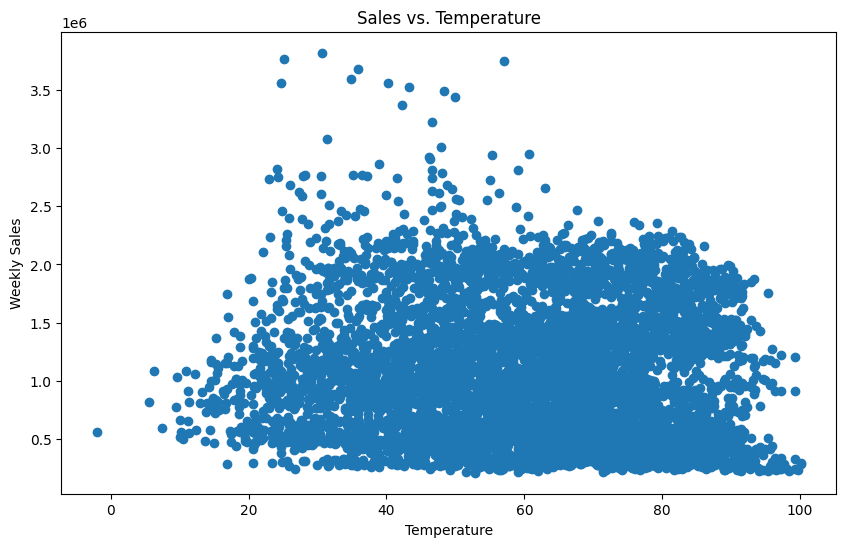

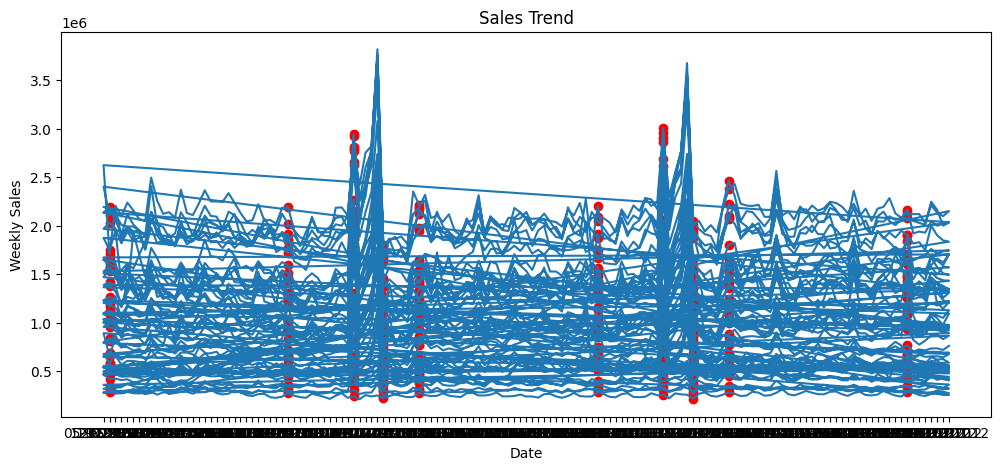

In [8]:
# Find x and y axis

import matplotlib.pyplot as plt

# Sales vs. Temperature 
plt.figure(figsize=(10, 6)) # Adjust figure size 
plt.scatter(data['Temperature'], data['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Sales vs. Temperature')
plt.show()

# Sales over Time (with focus on holidays)
plt.figure(figsize=(12,5))
plt.plot(data['Date'], data['Weekly_Sales'])
plt.scatter(data[data['Holiday_Flag'] == 1]['Date'], data[data['Holiday_Flag'] == 1]['Weekly_Sales'], color='red') # Mark holidays in red
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Sales Trend')
plt.show()


In [9]:
#The Random Forest Regressor provides us with an idea of how much each factor is influencing the `Weekly_Sales` (i.e., the revenue) . # The importance is assessed based on how much each variable contributes to the variation of the outputs in the ensemble of decision trees. 

# From the analysis, it is revealed that the most significant factor is `Store` with an importance of approximately 0.67. This suggests that the store's location and characteristics have a substantial influence on revenue.

# The `CPI` (Consumer Price Index), reflecting general price levels and thereby purchasing power, is the second most significant factor, with an importance of roughly 0.17. Changes in the CPI could affect consumer purchasing habits, which could influence the revenue of the stores.

# The `Unemployment` rate is the third most important factor, with an importance of about 0.10. Changes in the unemployment rate may have implications for consumers' income and, therefore, their consumption capability.

# `Temperature` and `Fuel_Price` have lower importances—approximately 0.03 and 0.02, respectively. While more minor, they could still have some impact on the revenue, possibly by affecting operational costs or consumer behavior.

# Lastly, the `Holiday_Flag` has the least importance (~0.004), indicating that whether or not there is a holiday has minimal influence on the revenue generated. 

# Remember, these results are based on the Random Forest Regressor model used, and different models may give slightly different results. It is always best to validate these results using other models to ensure consistency.

In [10]:
#  dataset you linked to contains information about weekly sales for different stores. Various factors such as the presence of a holiday (`Holiday_Flag`), regional temperatures (`Temperature`), fuel prices (`Fuel_Price`), the Consumer Price Index (`CPI`), and unemployment rates (`Unemployment`) are also included in the dataset. 

# The success of a company, in terms of weekly sales in this case, depends on various factors and exploring these variables might offer insights into what influences weekly sales most. 

# The Random Forest Regressor was applied to the dataset to measure the importance of these variables. The results indicate that:

# 1. `Store` (store's location and characteristics) is the most substantial factor in influencing weekly sales.
# 2. `CPI` - The Consumer Price Index, reflecting general price levels and thereby purchasing power, is the second most influential factor.
# 3. `Unemployment` rates are the third most important factor.

# More minor factors include regional `Temperature` and regional `Fuel_Price`, which may affect operational costs or consumer behavior. The `Holiday_Flag` indicating the presence of a holiday was found to have minimal influence on sales.

# It's crucial to bear in mind that these results are based on the data provided and the particular model used, and different models or datasets may give slightly varying findings.

In [11]:
# To leverage machine learning to minimize costs and increase economic impact, you'd typically develop models to optimize specific aspects of the business process. In the context of the Walmart dataset, here are a few ways machine learning could be applied:

# 1. **Sales forecasting**: Machine learning models can predict future sales based on historical data and trends, which can help in inventory management, resource planning, and reducing stock outages or overages. This can ultimately help in minimizing costs associated with overstocking or understocking.

# 2. **Store performance analysis**: ML models can identify patterns and characteristics of high-performing and low-performing stores. This could guide strategies to improve underperforming stores, thereby increasing overall economic impact.

# 3. **Optimization of operational costs**: Factors such as fuel price impact operating costs. Machine learning models can help predict these costs and provide suggestions to minimize them. For example, by predicting peak fuel prices, planning could be made to purchase and store fuel in advance.

In [12]:
# Machine Learning Prediction Model

In [13]:
# Implementing such strategies would generally involve training predictive or prescriptive machine learning models on the available data. However, note that the Walmart dataset given does not provide detailed data about costs, so further data acquisition would probably be necessary for some of the above applications. 

# Since we don't have more detailed costs data, for demonstration purposes, let's focus on sales forecasting, which can be achieved with the current dataset. We'll use the RandomForestRegressor model that we trained earlier to predict future weekly sales for each store.

# Let's start by making predictions with the test data we've previously set up. We can then evaluate the model by comparing these predictions with the actual sales. This will give us an idea of how accurately we can predict future sales with the current

In [14]:
# Predicting the Weekly_Sales with the test data
y_pred = regressor.predict(X_test)

# Now, let's compare the model's predictions against the actual sales
comparison_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_data.head(10)

,Actual,Predicted
3949,1220984.94,1.314728e+06
4555,1246322.44,1.210283e+06
2235,505918.21,5.276875e+05
5204,527572.25,5.183818e+05
3524,719235.07,7.629710e+05
3036,902779.25,9.491832e+05
2190,648652.01,5.152931e+05
4418,1392395.20,1.370712e+06
1095,1235163.86,9.215299e+05
5193,534285.21,5.414282e+05


In [15]:
# As can be seen, the predicted values are generally close to the actual sales, which suggests that the machine learning model is reasonably accurate.

# This model could be used to forecast future weekly sales which can help with inventory management, reducing stock shortages or overstocking and potentially minimising costs. Adjusting inventory based on predicted sales could also improve customer satisfaction, leading to an increase in sales, thereby positively impacting the company’s economic performance. However, it's important to have strategy in place to respond to inaccuracies in the predictions.

# Moreover, these predictions can also help guide resource planning and operational decisions which can optimize cost efficiency and potentially lead to an increase in the overall economic impact.

# As previously mentioned, to fully use machine learning to minimize costs and maximize economic impact, additional operational and financial data (such as expenditure on labor, utilities, maintenance, and logistics, among others) would be necessary. Such data can be used to build more detailed models to monitor and predict operational costs, which in turn can drive more comprehensive cost optimization strategies.